In [1]:
import pandas as pd

file_path = "Online Retail.xlsx"  # make sure your Excel file is in the same folder
data = pd.read_excel(file_path)

data.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Online Retail.xlsx'

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset (change file path if needed)
file_path = "Online Retail.xlsx"  # make sure the file is in the same folder
data = pd.read_excel(file_path)

# Display first 5 rows
data.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Online Retail.xlsx'

In [2]:
B


NameError: name 'B' is not defined

In [3]:
import os
print(os.getcwd())



/home/af6847c8-38e5-4376-a550-7fb5e61579c0


In [4]:
import pandas as pd

file_path = "Online Retail.xlsx"  # file is now in same folder
data = pd.read_excel(file_path)

data.head()



FileNotFoundError: [Errno 2] No such file or directory: 'Online Retail.xlsx'

In [5]:
import pandas as pd

# Load the uploaded Excel file
file_path = "Online Retail.xlsx"  
data = pd.read_excel(file_path)

# Show first 5 rows to confirm it's working
data.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Online Retail.xlsx'

In [6]:
import os

# List all files in the current working directory
print("Files in current folder:")
print(os.listdir())

# Print current folder path
print("\nCurrent folder:")
print(os.getcwd())

Files in current folder:
['Untitled Folder 1', '.profile', '.npm', '.jupyter', '.pythonstartup.py', '.gitconfig', 'RFM_Analysis_Project.ipynb', '.vimrc', '.virtualenvs', 'anaconda_projects', '.ipython', 'Untitled Folder', '.bashrc', '.anaconda', 'Online Retail.xlsx.zip', 'README.ipynb', '.local', '.ipynb_checkpoints']

Current folder:
/home/af6847c8-38e5-4376-a550-7fb5e61579c0


In [7]:
import zipfile
import os

# Extract the zip file
zip_path = "Online Retail.xlsx.zip"
extract_to = os.getcwd()  # current working directory

# Unzip it
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ File extracted successfully!")
print("\nNow files in current folder:")
print(os.listdir())


✅ File extracted successfully!

Now files in current folder:
['Online Retail.xlsx', 'Untitled Folder 1', '.profile', '.npm', '.jupyter', '.pythonstartup.py', '.gitconfig', 'RFM_Analysis_Project.ipynb', '.vimrc', '.virtualenvs', 'anaconda_projects', '.ipython', 'Untitled Folder', '.bashrc', '.anaconda', 'Online Retail.xlsx.zip', 'README.ipynb', '.local', '.ipynb_checkpoints']


In [14]:
import pandas as pd

# Load the extracted Excel file
file_path = "Online Retail.xlsx"
data = pd.read_excel(file_path)

# Display the first 5 rows to confirm
data.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
# Check what sheets are in the Excel file
excel_file = pd.ExcelFile("Online Retail.xlsx")
print("Sheets in this file:", excel_file.sheet_names)


Sheets in this file: ['Online Retail']


In [19]:
# Basic info about the data
data.info()

# Check missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [20]:
# Remove rows where CustomerID is missing
data = data.dropna(subset=['CustomerID'])

# Remove rows with missing Description
data = data.dropna(subset=['Description'])

# Remove duplicates (if any)
data = data.drop_duplicates()

# Convert CustomerID to integer (remove decimals)
data['CustomerID'] = data['CustomerID'].astype(int)

# Confirm cleaning done
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int64         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.6+ MB


In [21]:
# Import necessary libraries
import pandas as pd

# Ensure data is clean (we already did this)
rfm_data = data.copy()

# Compute 'TotalPrice' for each transaction
rfm_data['TotalPrice'] = rfm_data['Quantity'] * rfm_data['UnitPrice']

# Define the snapshot date — last invoice date in dataset
snapshot_date = rfm_data['InvoiceDate'].max() + pd.Timedelta(days=1)

# Create RFM table
rfm = rfm_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
})

# Rename columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

# Display top 5 rows
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346,326,2,0.00
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


In [22]:
# RFM Scoring
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

# Combine RFM score
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].astype(int).sum(axis=1)

# Segment customers based on RFM score
def segment_customer(df):
    if df['RFM_Score'] >= 12:
        return 'VIP'
    elif df['RFM_Score'] >= 9:
        return 'Loyal'
    elif df['RFM_Score'] >= 6:
        return 'Regular'
    else:
        return 'At Risk'

rfm['Customer_Segment'] = rfm.apply(segment_customer, axis=1)

# Display segment counts
rfm['Customer_Segment'].value_counts()


Customer_Segment
VIP        1278
Regular    1209
Loyal      1003
At Risk     882
Name: count, dtype: int64

Matplotlib is building the font cache; this may take a moment.


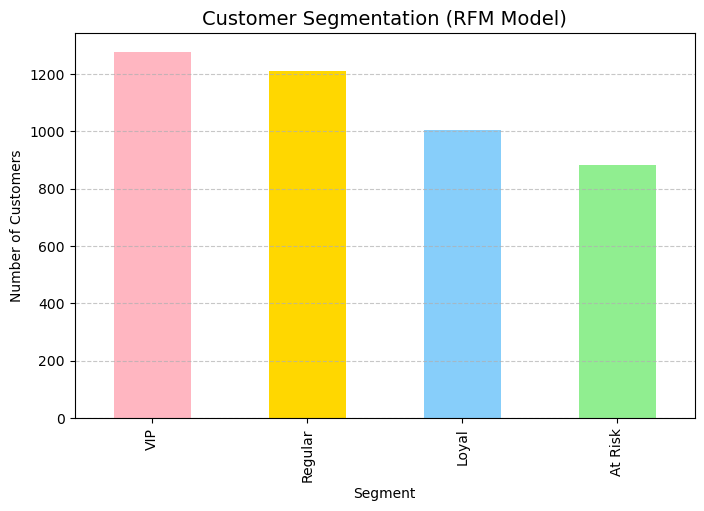

In [23]:
import matplotlib.pyplot as plt

# Count of each segment
segment_counts = rfm['Customer_Segment'].value_counts()

# Create a bar chart
plt.figure(figsize=(8,5))
segment_counts.plot(kind='bar', color=['#FFB6C1','#FFD700','#87CEFA','#90EE90'])
plt.title('Customer Segmentation (RFM Model)', fontsize=14)
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [24]:
rfm.to_excel("RFM_Segmentation_Output.xlsx", index=False)
print("✅ File saved successfully as RFM_Segmentation_Output.xlsx")


✅ File saved successfully as RFM_Segmentation_Output.xlsx


In [25]:
rfm_summary = rfm.groupby('Customer_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'sum']
}).round(2)

rfm_summary


Recency Frequency Monetary            
                    mean      mean     mean         sum
Customer_Segment                                       
At Risk           225.47      1.14   200.00   176397.06
Loyal              55.48      3.68  1085.77  1089027.89
Regular           102.97      1.85   469.81   568002.77
VIP                18.33     11.94  5043.11  6445091.70

In [26]:
# Summary of key metrics by customer segment
rfm_summary = rfm.groupby('Customer_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'sum', 'count']
}).round(2)

# Rename column levels for clarity
rfm_summary.columns = ['Recency_Avg', 'Frequency_Avg', 'Monetary_Avg', 'Monetary_Total', 'Customer_Count']

# Sort by total monetary value
rfm_summary = rfm_summary.sort_values(by='Monetary_Total', ascending=False)

rfm_summary


,Recency_Avg,Frequency_Avg,Monetary_Avg,Monetary_Total,Customer_Count
Customer_Segment,,,,,
VIP,18.33,11.94,5043.11,6445091.70,1278
Loyal,55.48,3.68,1085.77,1089027.89,1003
Regular,102.97,1.85,469.81,568002.77,1209
At Risk,225.47,1.14,200.00,176397.06,882


In [27]:
# Basic insights
print("Total Customers:", rfm['Customer_Segment'].count())
print("\nSegment distribution:")
print(rfm['Customer_Segment'].value_counts(normalize=True).mul(100).round(2))

print("\nTop segment by revenue:")
print(rfm_summary['Monetary_Total'].idxmax())

print("\nSegment with most customers:")
print(rfm_summary['Customer_Count'].idxmax())


Total Customers: 4372

Segment distribution:
Customer_Segment
VIP        29.23
Regular    27.65
Loyal      22.94
At Risk    20.17
Name: proportion, dtype: float64

Top segment by revenue:
VIP

Segment with most customers:
VIP


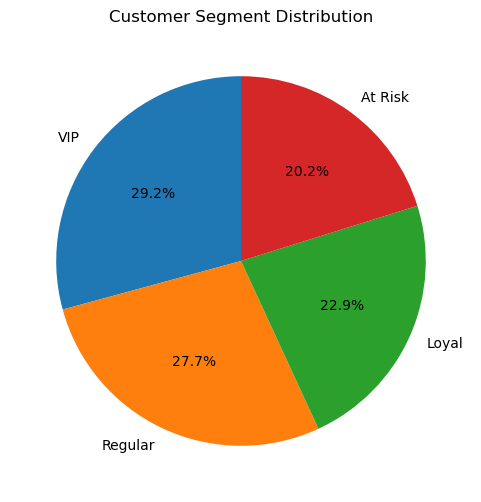

In [28]:
import matplotlib.pyplot as plt

# Count of each customer segment
segment_counts = rfm['Customer_Segment'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Segment Distribution')
plt.show()


In [34]:
rfm.to_csv("RFM_Customer_Segments.csv", index=True)


In [35]:
import os

# List all files in your current working folder
files = os.listdir()

# Print them out
print("Files in current folder:\n", files)


Files in current folder:
 ['RFM_Customer_Segments.csv', 'Online Retail.xlsx', '.config', 'Untitled Folder 1', '.cache', 'RFM_Segmentation_Output.xlsx', '.profile', '.npm', '.jupyter', '.pythonstartup.py', '.gitconfig', 'RFM_Analysis_Project.ipynb', '.vimrc', '.virtualenvs', 'anaconda_projects', '.ipython', 'Untitled Folder', '.bashrc', '.anaconda', 'Online Retail.xlsx.zip', 'README.ipynb', '.local', '.ipynb_checkpoints']


In [36]:
check = pd.read_csv("RFM_Customer_Segments.csv")
check.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Customer_Segment
0,12346,326,2,0.00,1,2,1,121,4,At Risk
1,12347,2,7,4310.00,5,4,5,545,14,VIP
2,12348,75,4,1797.24,2,3,4,234,9,Loyal
3,12349,19,1,1757.55,4,1,4,414,9,Loyal
4,12350,310,1,334.40,1,1,2,112,4,At Risk


In [37]:
from IPython.display import FileLink
FileLink('RFM_Customer_Segments.csv')


/home/af6847c8-38e5-4376-a550-7fb5e61579c0/RFM_Customer_Segments.csv